In [1]:
cd datasets/NLS

C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS


# Import

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Aggiungo gli headers al CSV
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('KDDTrain+.csv', encoding='cp1252', names = col_names)
df_test = pd.read_csv('KDDTest+.csv', encoding='cp1252', names = col_names)

labeldf=df['label']
labeldf_test=df_test['label']

C:\Users\Daniele\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Daniele\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
#Dataset Preparation ----------------------------------------------------------------------------------------------------------

def prepareMulticlass():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    return newlabeldf, newlabeldf_test

def prepareBinary():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    return newlabeldf, newlabeldf_test
  
colNames=list()
colNames_test=list()

def getFullDf():
    global colNames
    colNames=list(df)
    return df

def getFullDfTest():
    global colNames_test
    colNames_test=list(df_test)
    return df_test

def getReducedDf():
    global colNames
    df_reduced=df.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames=list(df_reduced)
    return df_reduced

def getReducedDfTest():
    global colNames_test
    df_reduced=df_test.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames_test=list(df_reduced)
    return df_reduced

def oneHotEcoding(df, column_name):
    df_drop = df.drop(column_name, axis=1, inplace=False)
    one_hot = pd.get_dummies(df[column_name])
    if(column_name == 'service'):
        column_list=list()
        for string in one_hot.columns.tolist():
            column_list.append(column_name+'_'+str(string))
        one_hot.columns=column_list
    df = pd.concat([df_drop, one_hot], axis=1)
    
    return df

def getXandY(df):
    X = df.drop('label',axis=1, inplace=False)
    Y = df.label
    return X, Y

def overSampledDF(X, Y): 
    sm = SMOTE(random_state=42)
    X_resampled, Y_resampled = sm.fit_resample(X, Y)
    df = pd.concat([X_resampled, Y_resampled], axis=1)
    return df

def createMulticlassDF(df):
    to_drop_DoS = [0,1]
    to_drop_Probe = [0,2]
    to_drop_R2L = [0,3]
    to_drop_U2R = [0,4]

    DoS_df=df[df['label'].isin(to_drop_DoS)];
    Probe_df=df[df['label'].isin(to_drop_Probe)];
    R2L_df=df[df['label'].isin(to_drop_R2L)];
    U2R_df=df[df['label'].isin(to_drop_U2R)];
    return DoS_df, Probe_df, R2L_df, U2R_df 

def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler.transform(df) 

def minMaxScaler(df):
    scaler = preprocessing.MinMaxScaler().fit(df)
    return scaler.transform(df)

def recursiveFeatureExtraction(model, X, Y, n):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, Y)
    X=rfe.transform(X)
    true=rfe.support_
    rfecolindex=[i for i, x in enumerate(true) if x]
    rfecolname=list(colNames[i] for i in rfecolindex)
    return X, rfecolindex

def adaptTestset(train, test):
    train_service_list=[]
    test_service_list = []
    
    for string in train.columns.tolist():
        if('service' in string):
            train_service_list.append(string)
    
    for string in test.columns.tolist():
        if('service' in string):
            test_service_list.append(string)

    difference=list(set(train_service_list) - set(test_service_list))

    for col in difference:
        test[col] = 0
    return test.reindex(columns=train.columns)

# Algorythms-------------------------------------------------------------------------------------------------------------------- 

def DT(X, Y):
    clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32)
    return clf_gini.fit(X, Y)

def stratifiedCV(model, X, Y, k, pos_label):
    skf = StratifiedKFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}
  
    
def KfoldCV(model, X, Y, k, pos_label):
    skf = KFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred )
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}

#Plotting-----------------------------------------------------------------------------------------------------------------------

def plotDf(y):
    plt.figure(figsize=(10,5))
    class_distribution = y.value_counts()
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title('Distribution of yi in train data')
    plt.grid()
    return plt

def plotConfusionMatrix(Y_pred, Y_test, pos_label):
    skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, pos_label=pos_label)
    print("F-measure: %0.5f " % f)

# Reduced DF, no oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

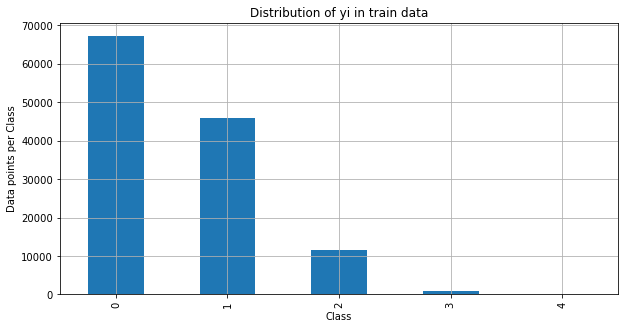

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

plotDf(reducedDf['label'])


In [5]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(reducedDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(reducedDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [6]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [7]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.998817152947103,
 'Mean Training Recall': 0.937703083666077,
 'Mean Training F1 Score': 0.9672957541647055,
 'Mean Validation Accuracy': 0.9742650304581971,
 'Mean Validation Precision': 0.998793005598157,
 'Mean Validation Recall': 0.9376632504397431,
 'Mean Validation F1 Score': 0.9672613811865638}

#### K-fold cross validation on dos Standard Scaler

In [8]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.998817152947103,
 'Mean Training Recall': 0.937703083666077,
 'Mean Training F1 Score': 0.9672957541647055,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.9988158366340814,
 'Mean Validation Recall': 0.9376632504397431,
 'Mean Validation F1 Score': 0.9672721154117386}

#### Stratified cross validation on dos

In [9]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.9988171654354598,
 'Mean Training Recall': 0.9377030703081388,
 'Mean Training F1 Score': 0.9672957579650721,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.998816843621289,
 'Mean Validation Recall': 0.9376619691304219,
 'Mean Validation F1 Score': 0.9672722877380643}

#### Stratified cross validation on dos Standard Scaler

In [10]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.9988171654354598,
 'Mean Training Recall': 0.9377030703081388,
 'Mean Training F1 Score': 0.9672957579650721,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.998816843621289,
 'Mean Validation Recall': 0.9376619691304219,
 'Mean Validation F1 Score': 0.9672722877380643}

#### Predict on dos

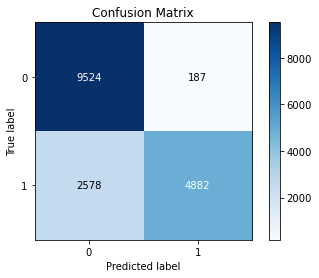

Accuracy: 0.83897 
Precision: 0.96311 
Recall: 0.65442 
F-measure: 0.77931 


In [11]:
y_dos_prediction = DT(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

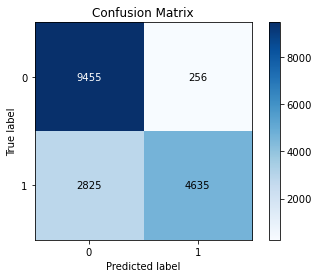

Accuracy: 0.82057 
Precision: 0.94766 
Recall: 0.62131 
F-measure: 0.75055 


In [12]:
y_dos_prediction = DT(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [13]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9774132072612289,
 'Mean Training Precision': 0.901648957574063,
 'Mean Training Recall': 0.9537646007950252,
 'Mean Training F1 Score': 0.926281086447822,
 'Mean Validation Accuracy': 0.9769744736154712,
 'Mean Validation Precision': 0.898682333838566,
 'Mean Validation Recall': 0.953177469609211,
 'Mean Validation F1 Score': 0.9243938228841669}

#### K-fold cross validation on probe Standard Scaler

In [14]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9774132072612289,
 'Mean Training Precision': 0.901648957574063,
 'Mean Training Recall': 0.9537646007950252,
 'Mean Training F1 Score': 0.926281086447822,
 'Mean Validation Accuracy': 0.9769744736154712,
 'Mean Validation Precision': 0.898682333838566,
 'Mean Validation Recall': 0.953177469609211,
 'Mean Validation F1 Score': 0.9243938228841669}

#### Stratified cross validation on probe

In [15]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.977406174813515,
 'Mean Training Precision': 0.9015316442092107,
 'Mean Training Recall': 0.9537767930185563,
 'Mean Training F1 Score': 0.9262167350287662,
 'Mean Validation Accuracy': 0.9770377647547118,
 'Mean Validation Precision': 0.8998827073408275,
 'Mean Validation Recall': 0.9531577087581622,
 'Mean Validation F1 Score': 0.9250957542420464}

#### Stratified cross validation on probe Standard Scaler

In [16]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.977406174813515,
 'Mean Training Precision': 0.9015316442092107,
 'Mean Training Recall': 0.9537767930185563,
 'Mean Training F1 Score': 0.9262167350287662,
 'Mean Validation Accuracy': 0.9770377647547118,
 'Mean Validation Precision': 0.8998827073408275,
 'Mean Validation Recall': 0.9531577087581622,
 'Mean Validation F1 Score': 0.9250957542420464}

#### Predict on probe

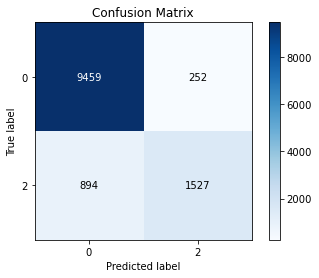

Accuracy: 0.90554 
Precision: 0.85835 
Recall: 0.63073 
F-measure: 0.72714 


In [17]:
y_probe_prediction = DT(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

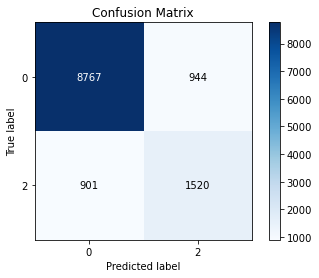

Accuracy: 0.84792 
Precision: 0.61688 
Recall: 0.62784 
F-measure: 0.62231 


In [18]:
y_probe_prediction = DT(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [19]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9894348678728099,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743700057756676,
 'Mean Training F1 Score': 0.43058501492879897,
 'Mean Validation Accuracy': 0.9894202359643145,
 'Mean Validation Precision': 0.9967741935483871,
 'Mean Validation Recall': 0.2743061177667925,
 'Mean Validation F1 Score': 0.4290428900935173}

#### K-fold cross validation on r2l Standard Scaler

In [20]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9894348678728099,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743700057756676,
 'Mean Training F1 Score': 0.43058501492879897,
 'Mean Validation Accuracy': 0.9894348686830737,
 'Mean Validation Precision': 1.0,
 'Mean Validation Recall': 0.2743061177667925,
 'Mean Validation F1 Score': 0.4294701796534091}

#### Stratified cross validation on r2l

In [21]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9894348679521162,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743717577813248,
 'Mean Training F1 Score': 0.43058723102756946,
 'Mean Validation Accuracy': 0.9894202423887484,
 'Mean Validation Precision': 0.9971428571428571,
 'Mean Validation Recall': 0.27436363636363637,
 'Mean Validation F1 Score': 0.4292599861408578}

#### Stratified cross validation on r2l Standard Scaler

In [22]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9894348679521162,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743717577813248,
 'Mean Training F1 Score': 0.43058723102756946,
 'Mean Validation Accuracy': 0.9894348751075075,
 'Mean Validation Precision': 1.0,
 'Mean Validation Recall': 0.27436363636363637,
 'Mean Validation F1 Score': 0.42963588442720385}

#### Predict on r2l

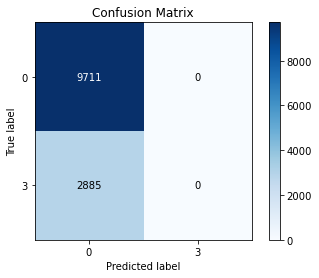

Accuracy: 0.77096 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
y_r2l_prediction = DT(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

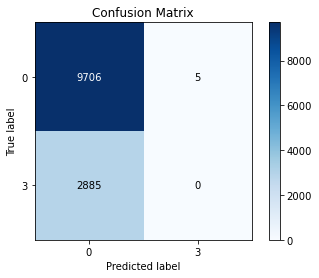

Accuracy: 0.77056 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


In [24]:
y_r2l_prediction = DT(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [25]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992712943871485,
 'Mean Training Precision': 0.3864363296913512,
 'Mean Training Recall': 0.30343799932722226,
 'Mean Training F1 Score': 0.33947609145717317,
 'Mean Validation Accuracy': 0.9991245674344343,
 'Mean Validation Precision': 0.24166666666666664,
 'Mean Validation Recall': 0.1975,
 'Mean Validation F1 Score': 0.21262626262626264}

#### K-fold cross validation on u2r Standard Scaler

In [26]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Pr

>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992712943871485,
 'Mean Training Precision': 0.3864363296913512,
 'Mean Training Recall': 0.30343799932722226,
 'Mean Training F1 Score': 0.33947609145717317,
 'Mean Validation Accuracy': 0.9991245674344343,
 'Mean Validation Precision': 0.24166666666666664,
 'Mean Validation Recall': 0.1975,
 'Mean Validation F1 Score': 0.21262626262626264}

#### Stratified cross validation on u2r

In [27]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992729430558484,
 'Mean Training Precision': 0.38683550353092755,
 'Mean Training Recall': 0.30948196114708604,
 'Mean Training F1 Score': 0.3434925145964838,
 'Mean Validation Accuracy': 0.9991097306391821,
 'Mean Validation Precision': 0.19833333333333333,
 'Mean Validation Recall': 0.15999999999999998,
 'Mean Validation F1 Score': 0.17484848484848486}

#### Stratified cross validation on u2r Standard Scaler

In [28]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992729430558484,
 'Mean Training Precision': 0.38683550353092755,
 'Mean Training Recall': 0.30948196114708604,
 'Mean Training F1 Score': 0.3434925145964838,
 'Mean Validation Accuracy': 0.9991097306391821,
 'Mean Validation Precision': 0.19833333333333333,
 'Mean Validation Recall': 0.15999999999999998,
 'Mean Validation F1 Score': 0.17484848484848486}

#### Predict on u2r

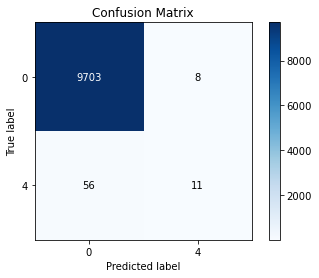

Accuracy: 0.99345 
Precision: 0.57895 
Recall: 0.16418 
F-measure: 0.25581 


In [29]:
y_u2r_prediction = DT(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

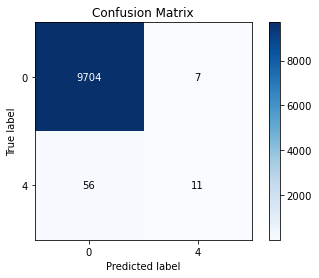

Accuracy: 0.99356 
Precision: 0.61111 
Recall: 0.16418 
F-measure: 0.25882 


In [30]:
y_u2r_prediction = DT(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Feature Selection

In [31]:

X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [32]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [33]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.998817152947103,
 'Mean Training Recall': 0.937703083666077,
 'Mean Training F1 Score': 0.9672957541647055,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.9988158366340814,
 'Mean Validation Recall': 0.9376632504397431,
 'Mean Validation F1 Score': 0.9672721154117386}

#### K-fold cross validation on dos Standard Scaler

In [34]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.998817152947103,
 'Mean Training Recall': 0.937703083666077,
 'Mean Training F1 Score': 0.9672957541647055,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.9988158366340814,
 'Mean Validation Recall': 0.9376632504397431,
 'Mean Validation F1 Score': 0.9672721154117386}

#### Stratified cross validation on dos

In [35]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.9988171654354598,
 'Mean Training Recall': 0.9377030703081388,
 'Mean Training F1 Score': 0.9672957579650721,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.998816843621289,
 'Mean Validation Recall': 0.9376619691304219,
 'Mean Validation F1 Score': 0.9672722877380643}

#### Stratified cross validation on dos Standard Scaler

In [36]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9742905349067617,
 'Mean Training Precision': 0.9988171654354598,
 'Mean Training Recall': 0.9377030703081388,
 'Mean Training F1 Score': 0.9672957579650721,
 'Mean Validation Accuracy': 0.9742738589211617,
 'Mean Validation Precision': 0.998816843621289,
 'Mean Validation Recall': 0.9376619691304219,
 'Mean Validation F1 Score': 0.9672722877380643}

#### Predict on dos

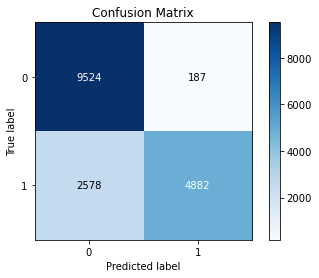

Accuracy: 0.83897 
Precision: 0.96311 
Recall: 0.65442 
F-measure: 0.77931 


In [37]:
y_dos_rfe_prediction = DT(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

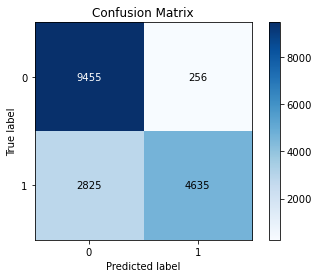

Accuracy: 0.82057 
Precision: 0.94766 
Recall: 0.62131 
F-measure: 0.75055 


In [38]:
y_dos_rfe_prediction = DT(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [39]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9733203226918257,
 'Mean Training Precision': 0.8775520174281513,
 'Mean Training Recall': 0.9609893383945041,
 'Mean Training F1 Score': 0.9154841471076558,
 'Mean Validation Accuracy': 0.9726959926028131,
 'Mean Validation Precision': 0.8734400596659327,
 'Mean Validation Recall': 0.9606551556853878,
 'Mean Validation F1 Score': 0.9129415913587886}

#### K-fold cross validation on probe Standard Scaler

In [40]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9733203226918257,
 'Mean Training Precision': 0.8775520174281513,
 'Mean Training Recall': 0.9609893383945041,
 'Mean Training F1 Score': 0.9154841471076558,
 'Mean Validation Accuracy': 0.9726959926028131,
 'Mean Validation Precision': 0.8734400596659327,
 'Mean Validation Recall': 0.9606551556853878,
 'Mean Validation F1 Score': 0.9129415913587886}

#### Stratified cross validation on probe

In [41]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9733090707754837,
 'Mean Training Precision': 0.8773944979406195,
 'Mean Training Recall': 0.9609929133501238,
 'Mean Training F1 Score': 0.9153842192067051,
 'Mean Validation Accuracy': 0.9727972584255978,
 'Mean Validation Precision': 0.8750098306555995,
 'Mean Validation Recall': 0.9607073815325495,
 'Mean Validation F1 Score': 0.9139712046472461}

#### Stratified cross validation on probe Standard Scaler

In [42]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9733090707754837,
 'Mean Training Precision': 0.8773944979406195,
 'Mean Training Recall': 0.9609929133501238,
 'Mean Training F1 Score': 0.9153842192067051,
 'Mean Validation Accuracy': 0.9727972584255978,
 'Mean Validation Precision': 0.8750098306555995,
 'Mean Validation Recall': 0.9607073815325495,
 'Mean Validation F1 Score': 0.9139712046472461}

#### Predict on probe

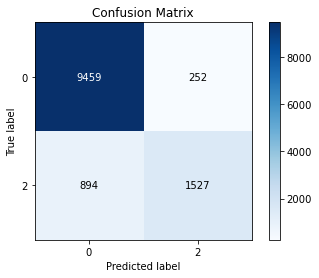

Accuracy: 0.90554 
Precision: 0.85835 
Recall: 0.63073 
F-measure: 0.72714 


In [43]:
y_probe_rfe_prediction = DT(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

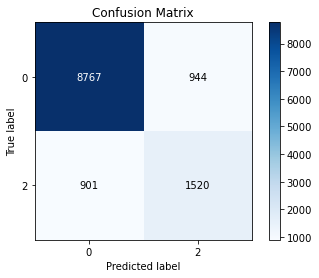

Accuracy: 0.84792 
Precision: 0.61688 
Recall: 0.62784 
F-measure: 0.62231 


In [44]:
y_probe_rfe_prediction = DT(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [45]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9894348678728099,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743700057756676,
 'Mean Training F1 Score': 0.43058501492879897,
 'Mean Validation Accuracy': 0.9894348686830737,
 'Mean Validation Precision': 1.0,
 'Mean Validation Recall': 0.2743061177667925,
 'Mean Validation F1 Score': 0.4294701796534091}

#### K-fold cross validation on r2l Standard Scaler

In [46]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9894348678728099,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743700057756676,
 'Mean Training F1 Score': 0.43058501492879897,
 'Mean Validation Accuracy': 0.9894348686830737,
 'Mean Validation Precision': 1.0,
 'Mean Validation Recall': 0.2743061177667925,
 'Mean Validation F1 Score': 0.4294701796534091}

#### Stratified cross validation on r2l

In [47]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9894348679521162,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743717577813248,
 'Mean Training F1 Score': 0.43058723102756946,
 'Mean Validation Accuracy': 0.9894348751075075,
 'Mean Validation Precision': 1.0,
 'Mean Validation Recall': 0.27436363636363637,
 'Mean Validation F1 Score': 0.42963588442720385}

#### Stratified cross validation on r2l Standard Scaler

In [48]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9894348679521162,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 0.2743717577813248,
 'Mean Training F1 Score': 0.43058723102756946,
 'Mean Validation Accuracy': 0.9894348751075075,
 'Mean Validation Precision': 1.0,
 'Mean Validation Recall': 0.27436363636363637,
 'Mean Validation F1 Score': 0.42963588442720385}

#### Predict on r2l

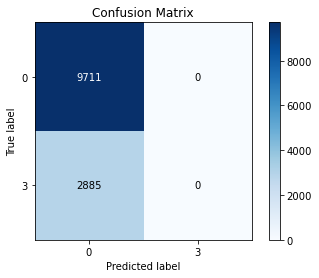

Accuracy: 0.77096 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
y_r2l_rfe_prediction = DT(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

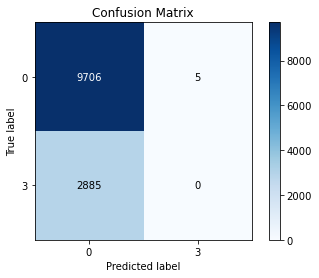

Accuracy: 0.77056 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


In [50]:
y_r2l_rfe_prediction = DT(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [51]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Pr

>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992712943871485,
 'Mean Training Precision': 0.3864363296913512,
 'Mean Training Recall': 0.30343799932722226,
 'Mean Training F1 Score': 0.33947609145717317,
 'Mean Validation Accuracy': 0.9991245674344343,
 'Mean Validation Precision': 0.24166666666666664,
 'Mean Validation Recall': 0.1975,
 'Mean Validation F1 Score': 0.21262626262626264}

#### K-fold cross validation on u2r Standard Scaler

In [52]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Pr

>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992712943871485,
 'Mean Training Precision': 0.3864363296913512,
 'Mean Training Recall': 0.30343799932722226,
 'Mean Training F1 Score': 0.33947609145717317,
 'Mean Validation Accuracy': 0.9991245674344343,
 'Mean Validation Precision': 0.24166666666666664,
 'Mean Validation Recall': 0.1975,
 'Mean Validation F1 Score': 0.21262626262626264}

#### Stratified cross validation on u2r

In [53]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992729430558484,
 'Mean Training Precision': 0.38683550353092755,
 'Mean Training Recall': 0.30948196114708604,
 'Mean Training F1 Score': 0.3434925145964838,
 'Mean Validation Accuracy': 0.9991097306391821,
 'Mean Validation Precision': 0.19833333333333333,
 'Mean Validation Recall': 0.15999999999999998,
 'Mean Validation F1 Score': 0.17484848484848486}

#### Stratified cross validation on u2r Standard Scaler

In [54]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992729430558484,
 'Mean Training Precision': 0.38683550353092755,
 'Mean Training Recall': 0.30948196114708604,
 'Mean Training F1 Score': 0.3434925145964838,
 'Mean Validation Accuracy': 0.9991097306391821,
 'Mean Validation Precision': 0.19833333333333333,
 'Mean Validation Recall': 0.15999999999999998,
 'Mean Validation F1 Score': 0.17484848484848486}

#### Predict on u2r

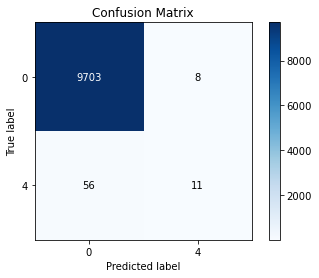

Accuracy: 0.99345 
Precision: 0.57895 
Recall: 0.16418 
F-measure: 0.25581 


In [55]:
y_u2r_rfe_prediction = DT(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

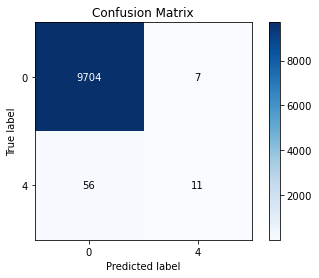

Accuracy: 0.99356 
Precision: 0.61111 
Recall: 0.16418 
F-measure: 0.25882 


In [56]:
y_u2r_rfe_prediction = DT(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

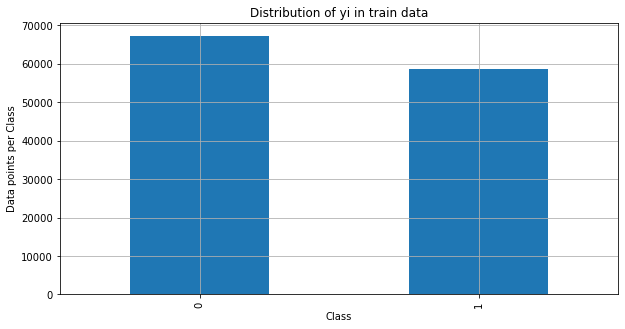

In [57]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareBinary()
plotDf(reducedDf['label'])

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)

#### K-fold cross validation

In [58]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9586895608714607,
 'Mean Training Precision': 0.948372637882082,
 'Mean Training Recall': 0.9637025859058566,
 'Mean Training F1 Score': 0.9559759176574246,
 'Mean Validation Accuracy': 0.958546650212166,
 'Mean Validation Precision': 0.9481058636728941,
 'Mean Validation Recall': 0.9636464782294244,
 'Mean Validation F1 Score': 0.9558108761142355}

#### K-fold cross validation Standard Scaler

In [59]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9586895608714607,
 'Mean Training Precision': 0.948372637882082,
 'Mean Training Recall': 0.9637025859058566,
 'Mean Training F1 Score': 0.9559759176574246,
 'Mean Validation Accuracy': 0.958546650212166,
 'Mean Validation Precision': 0.9481058636728941,
 'Mean Validation Recall': 0.9636464782294244,
 'Mean Validation F1 Score': 0.9558108761142355}

#### Predict

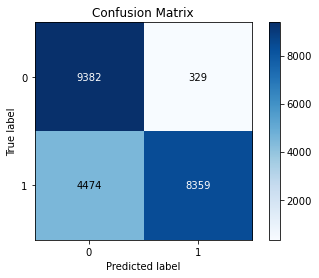

Accuracy: 0.78695 
Precision: 0.96213 
Recall: 0.65137 
F-measure: 0.77682 


In [60]:
y_prediction = DT(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

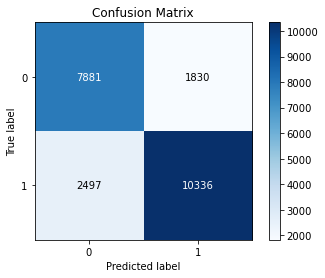

Accuracy: 0.80806 
Precision: 0.84958 
Recall: 0.80542 
F-measure: 0.82691 


In [61]:
y_prediction = DT(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [62]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), x_df, y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [63]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), x_df_ss, y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [64]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9586860327879159,
 'Mean Training Precision': 0.9483705839029554,
 'Mean Training Recall': 0.9636969117177383,
 'Mean Training F1 Score': 0.9559720841486012,
 'Mean Validation Accuracy': 0.958546650212166,
 'Mean Validation Precision': 0.9481058636728941,
 'Mean Validation Recall': 0.9636464782294244,
 'Mean Validation F1 Score': 0.9558108761142355}

#### K-fold cross validation Standard Scaler

In [65]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9586860327879159,
 'Mean Training Precision': 0.9483705839029554,
 'Mean Training Recall': 0.9636969117177383,
 'Mean Training F1 Score': 0.9559720841486012,
 'Mean Validation Accuracy': 0.958546650212166,
 'Mean Validation Precision': 0.9481058636728941,
 'Mean Validation Recall': 0.9636464782294244,
 'Mean Validation F1 Score': 0.9558108761142355}

#### Predict

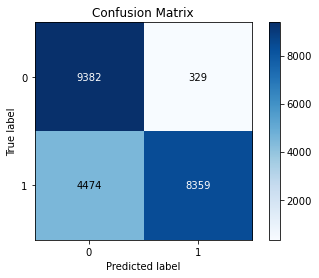

Accuracy: 0.78695 
Precision: 0.96213 
Recall: 0.65137 
F-measure: 0.77682 


In [66]:
y_prediction = DT(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

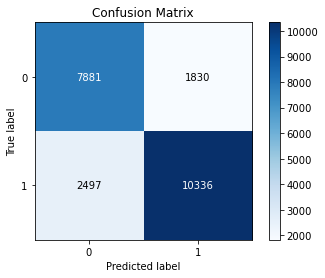

Accuracy: 0.80806 
Precision: 0.84958 
Recall: 0.80542 
F-measure: 0.82691 


In [67]:
y_prediction = DT(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

# Reduced DF, oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

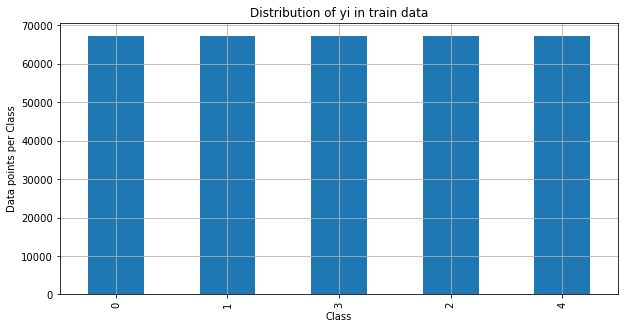

In [68]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)


oversampled_df = overSampledDF(x_df, y_df)
oversampled_df_test = overSampledDF(x_df_test, y_df_test)

plotDf(oversampled_df['label'])

In [69]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(oversampled_df)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(oversampled_df_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [70]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [71]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9686695114054551,
 'Mean Training Precision': 0.9991900598044186,
 'Mean Training Recall': 0.9380870654133409,
 'Mean Training F1 Score': 0.9676749341959049,
 'Mean Validation Accuracy': 0.9686230658073407,
 'Mean Validation Precision': 0.9990316349933902,
 'Mean Validation Recall': 0.9376626378296203,
 'Mean Validation F1 Score': 0.9673738749469569}

#### K-fold cross validation on dos Standard Scaler

In [72]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9686695114054551,
 'Mean Training Precision': 0.9991900598044186,
 'Mean Training Recall': 0.9380870654133409,
 'Mean Training F1 Score': 0.9676749341959049,
 'Mean Validation Accuracy': 0.9686230658073407,
 'Mean Validation Precision': 0.9990316349933902,
 'Mean Validation Recall': 0.9376626378296203,
 'Mean Validation F1 Score': 0.9673738749469569}

#### Stratified cross validation on dos

In [73]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9686752893988968,
 'Mean Training Precision': 0.9991933667269042,
 'Mean Training Recall': 0.9381078957134017,
 'Mean Training F1 Score': 0.967687568129086,
 'Mean Validation Accuracy': 0.968653031547456,
 'Mean Validation Precision': 0.9991773139918985,
 'Mean Validation Recall': 0.9380782206617397,
 'Mean Validation F1 Score': 0.9676631270750512}

#### Stratified cross validation on dos Standard Scaler

In [74]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9686752893988968,
 'Mean Training Precision': 0.9991933667269042,
 'Mean Training Recall': 0.9381078957134017,
 'Mean Training F1 Score': 0.967687568129086,
 'Mean Validation Accuracy': 0.9686604560036145,
 'Mean Validation Precision': 0.9991930993068261,
 'Mean Validation Recall': 0.9380782206617397,
 'Mean Validation F1 Score': 0.9676705409353497}

#### Predict on dos

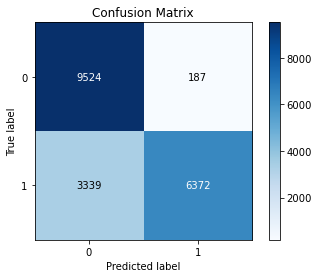

Accuracy: 0.81845 
Precision: 0.97149 
Recall: 0.65616 
F-measure: 0.78328 


In [75]:
y_dos_prediction = DT(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

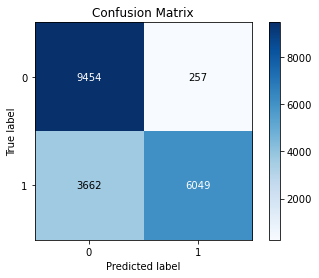

Accuracy: 0.79822 
Precision: 0.95925 
Recall: 0.62290 
F-measure: 0.75532 


In [76]:
y_dos_prediction = DT(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [77]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9714479987137951,
 'Mean Training Precision': 0.959128639468805,
 'Mean Training Recall': 0.9841327621890888,
 'Mean Training F1 Score': 0.9714587133415327,
 'Mean Validation Accuracy': 0.9704947068170027,
 'Mean Validation Precision': 0.8897238018861022,
 'Mean Validation Recall': 0.9836345627596594,
 'Mean Validation F1 Score': 0.9316575590728909}

#### K-fold cross validation on probe Standard Scaling

In [78]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9617422886929811,
 'Mean Training Precision': 0.9660983843539246,
 'Mean Training Recall': 0.9565239075327854,
 'Mean Training F1 Score': 0.9612829849813413,
 'Mean Validation Accuracy': 0.9607158843869067,
 'Mean Validation Precision': 0.9049335297993737,
 'Mean Validation Recall': 0.9559463612766532,
 'Mean Validation F1 Score': 0.9278856319953299}

#### Stratified cross validation on probe

In [79]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9711105829526024,
 'Mean Training Precision': 0.9601706183212789,
 'Mean Training Recall': 0.982997490308593,
 'Mean Training F1 Score': 0.9714499617746135,
 'Mean Validation Accuracy': 0.9710734378824066,
 'Mean Validation Precision': 0.960131969257995,
 'Mean Validation Recall': 0.982967780428805,
 'Mean Validation F1 Score': 0.9714142601553715}

#### Stratified cross validation on probe Standard Scaling

In [80]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9614601531932699,
 'Mean Training Precision': 0.9660905144072736,
 'Mean Training Recall': 0.9564930465139534,
 'Mean Training F1 Score': 0.961267717912467,
 'Mean Validation Accuracy': 0.9612505946235249,
 'Mean Validation Precision': 0.9658534225448493,
 'Mean Validation Recall': 0.956313163551471,
 'Mean Validation F1 Score': 0.9610583428983996}

#### Predict on probe

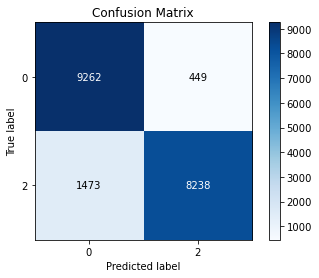

Accuracy: 0.90104 
Precision: 0.94831 
Recall: 0.84832 
F-measure: 0.89553 


In [81]:
y_probe_rfe_prediction = DT(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

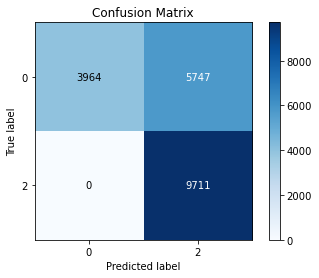

Accuracy: 0.70410 
Precision: 0.62822 
Recall: 1.00000 
F-measure: 0.77166 


In [82]:
y_probe_rfe_prediction = DT(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [83]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9237386641099194,
 'Mean Training Precision': 0.8994383469781668,
 'Mean Training Recall': 0.9543434056624053,
 'Mean Training F1 Score': 0.9251173746053784,
 'Mean Validation Accuracy': 0.8736554606478133,
 'Mean Validation Precision': 0.5395134644404178,
 'Mean Validation Recall': 0.9528960672358103,
 'Mean Validation F1 Score': 0.5512930177697066}

#### K-fold cross validation on r2l Standard Scaling

In [84]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9237386641099194,
 'Mean Training Precision': 0.8994383469781668,
 'Mean Training Recall': 0.9543434056624053,
 'Mean Training F1 Score': 0.9251173746053784,
 'Mean Validation Accuracy': 0.8736554606478133,
 'Mean Validation Precision': 0.5395134644404178,
 'Mean Validation Recall': 0.9528960672358103,
 'Mean Validation F1 Score': 0.5512930177697066}

#### Stratified cross validation on r2l

In [85]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9235852281125263,
 'Mean Training Precision': 0.932211195303821,
 'Mean Training Recall': 0.9136064636477592,
 'Mean Training F1 Score': 0.9228150146440838,
 'Mean Validation Accuracy': 0.9235778235926724,
 'Mean Validation Precision': 0.9322183229611406,
 'Mean Validation Recall': 0.9135917125672137,
 'Mean Validation F1 Score': 0.9228067011320797}

#### Stratified cross validation on r2l Standard Scaling

In [86]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9235852281125263,
 'Mean Training Precision': 0.932211195303821,
 'Mean Training Recall': 0.9136064636477592,
 'Mean Training F1 Score': 0.9228150146440838,
 'Mean Validation Accuracy': 0.9235778235926724,
 'Mean Validation Precision': 0.9322183229611406,
 'Mean Validation Recall': 0.9135917125672137,
 'Mean Validation F1 Score': 0.9228067011320797}

#### Predict on r2l

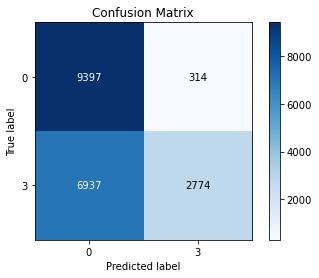

Accuracy: 0.62666 
Precision: 0.89832 
Recall: 0.28566 
F-measure: 0.43347 


In [87]:
y_r2l_rfe_prediction = DT(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

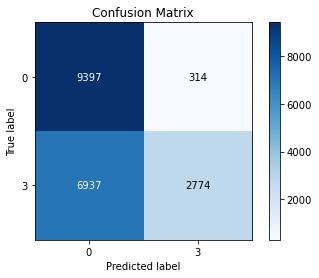

Accuracy: 0.62666 
Precision: 0.89832 
Recall: 0.28566 
F-measure: 0.43347 


In [88]:
y_probe_rfy_r2l_rfe_predictione_prediction = DT(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [89]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9539034976124794,
 'Mean Training Precision': 0.9178754828620856,
 'Mean Training Recall': 0.9950099731364137,
 'Mean Training F1 Score': 0.9548094691862625,
 'Mean Validation Accuracy': 0.9539236773404118,
 'Mean Validation Precision': 0.5042078346468309,
 'Mean Validation Recall': 0.9759273489907292,
 'Mean Validation F1 Score': 0.5071402239405481}

#### K-fold cross validation on u2r Standard Scaling

In [90]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9539034976124794,
 'Mean Training Precision': 0.9178754828620856,
 'Mean Training Recall': 0.9950099731364137,
 'Mean Training F1 Score': 0.9548094691862625,
 'Mean Validation Accuracy': 0.9539162528842533,
 'Mean Validation Precision': 0.5042072132766683,
 'Mean Validation Recall': 0.9759273489907292,
 'Mean Validation F1 Score': 0.5071389995806843}

#### Stratified cross validation on u2r

In [91]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9539034823406096,
 'Mean Training Precision': 0.9194212580514304,
 'Mean Training Recall': 0.9950106172655537,
 'Mean Training F1 Score': 0.9557236106825169,
 'Mean Validation Accuracy': 0.9538778952154111,
 'Mean Validation Precision': 0.9193924195123271,
 'Mean Validation Recall': 0.9950106155005931,
 'Mean Validation F1 Score': 0.9557043956718878}

#### Stratified cross validation on u2r Standard Scaling

In [92]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9539034823406096,
 'Mean Training Precision': 0.9194212580514304,
 'Mean Training Recall': 0.9950106172655537,
 'Mean Training F1 Score': 0.9557236106825169,
 'Mean Validation Accuracy': 0.9539001696864196,
 'Mean Validation Precision': 0.9194301491269081,
 'Mean Validation Recall': 0.9950106155005931,
 'Mean Validation F1 Score': 0.9557248102065852}

#### Predict on u2r

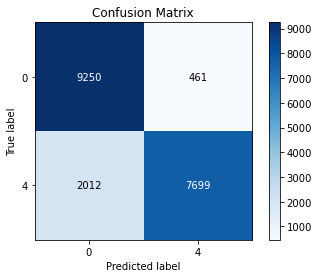

Accuracy: 0.87267 
Precision: 0.94350 
Recall: 0.79281 
F-measure: 0.86162 


In [93]:
y_u2r_rfe_prediction = DT(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

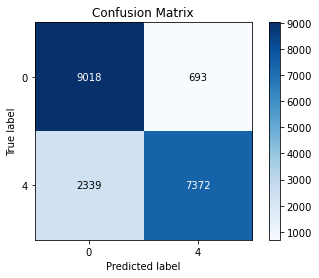

Accuracy: 0.84389 
Precision: 0.91407 
Recall: 0.75914 
F-measure: 0.82943 


In [94]:
y_u2r_rfe_prediction = DT(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Feature selection

In [95]:
X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [96]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [97]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9686695114054551,
 'Mean Training Precision': 0.9991900598044186,
 'Mean Training Recall': 0.9380870654133409,
 'Mean Training F1 Score': 0.9676749341959049,
 'Mean Validation Accuracy': 0.9686230658073407,
 'Mean Validation Precision': 0.9990316349933902,
 'Mean Validation Recall': 0.9376626378296203,
 'Mean Validation F1 Score': 0.9673738749469569}

#### K-fold cross validation on dos Standard Scaler

In [98]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9686695114054551,
 'Mean Training Precision': 0.9991900598044186,
 'Mean Training Recall': 0.9380870654133409,
 'Mean Training F1 Score': 0.9676749341959049,
 'Mean Validation Accuracy': 0.9686230658073407,
 'Mean Validation Precision': 0.9990316349933902,
 'Mean Validation Recall': 0.9376626378296203,
 'Mean Validation F1 Score': 0.9673738749469569}

#### Stratified cross validation on dos

In [99]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9686752893988968,
 'Mean Training Precision': 0.9991933667269042,
 'Mean Training Recall': 0.9381078957134017,
 'Mean Training F1 Score': 0.967687568129086,
 'Mean Validation Accuracy': 0.9686604560036145,
 'Mean Validation Precision': 0.9991930993068261,
 'Mean Validation Recall': 0.9380782206617397,
 'Mean Validation F1 Score': 0.9676705409353497}

#### Stratified cross validation on dos Standard Scaler

In [100]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9686752893988968,
 'Mean Training Precision': 0.9991933667269042,
 'Mean Training Recall': 0.9381078957134017,
 'Mean Training F1 Score': 0.967687568129086,
 'Mean Validation Accuracy': 0.9686604560036145,
 'Mean Validation Precision': 0.9991930993068261,
 'Mean Validation Recall': 0.9380782206617397,
 'Mean Validation F1 Score': 0.9676705409353497}

#### Predict on dos

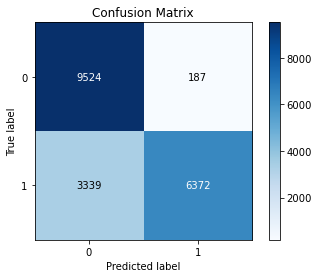

Accuracy: 0.81845 
Precision: 0.97149 
Recall: 0.65616 
F-measure: 0.78328 


In [101]:
y_dos_rfe_prediction = DT(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

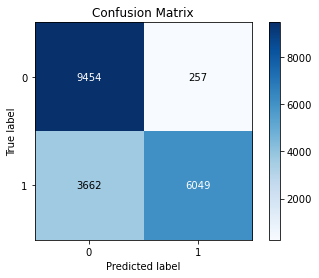

Accuracy: 0.79822 
Precision: 0.95925 
Recall: 0.62290 
F-measure: 0.75532 


In [102]:
y_dos_rfe_prediction = DT(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [103]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9714735726844428,
 'Mean Training Precision': 0.9591289650346715,
 'Mean Training Recall': 0.9841817495289232,
 'Mean Training F1 Score': 0.9714827378742779,
 'Mean Validation Accuracy': 0.9705169801854783,
 'Mean Validation Precision': 0.8897481073421758,
 'Mean Validation Recall': 0.9837830776111446,
 'Mean Validation F1 Score': 0.9317316176012864}

#### K-fold cross validation on probe Standard Scaler

In [104]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9617422886929811,
 'Mean Training Precision': 0.9660983843539246,
 'Mean Training Recall': 0.9565239075327854,
 'Mean Training F1 Score': 0.9612829849813413,
 'Mean Validation Accuracy': 0.9607158843869067,
 'Mean Validation Precision': 0.9049335297993737,
 'Mean Validation Recall': 0.9559463612766532,
 'Mean Validation F1 Score': 0.9278856319953299}

#### Stratified cross validation on probe

In [105]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9711105829526024,
 'Mean Training Precision': 0.9601706183212789,
 'Mean Training Recall': 0.982997490308593,
 'Mean Training F1 Score': 0.9714499617746135,
 'Mean Validation Accuracy': 0.9710734378824066,
 'Mean Validation Precision': 0.960131969257995,
 'Mean Validation Recall': 0.982967780428805,
 'Mean Validation F1 Score': 0.9714142601553715}

#### Stratified cross validation on probe Standard Scaler

In [106]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9614601531932699,
 'Mean Training Precision': 0.9660905144072736,
 'Mean Training Recall': 0.9564930465139534,
 'Mean Training F1 Score': 0.961267717912467,
 'Mean Validation Accuracy': 0.9612505946235249,
 'Mean Validation Precision': 0.9658534225448493,
 'Mean Validation Recall': 0.956313163551471,
 'Mean Validation F1 Score': 0.9610583428983996}

#### Predict on probe

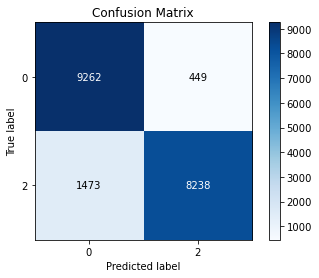

Accuracy: 0.90104 
Precision: 0.94831 
Recall: 0.84832 
F-measure: 0.89553 


In [107]:
y_probe_rfe_prediction = DT(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

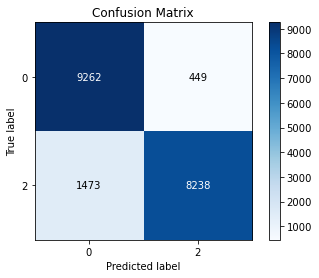

Accuracy: 0.90104 
Precision: 0.94831 
Recall: 0.84832 
F-measure: 0.89553 


In [108]:
y_r2l_rfe_prediction = DT(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [109]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9242575682240289,
 'Mean Training Precision': 0.9318821638407775,
 'Mean Training Recall': 0.9140625213417886,
 'Mean Training F1 Score': 0.9228448473810472,
 'Mean Validation Accuracy': 0.9235181082088797,
 'Mean Validation Precision': 0.5840939050635139,
 'Mean Validation Recall': 0.9154178610753096,
 'Mean Validation F1 Score': 0.6199711991527946}

#### K-fold cross validation on r2l Standard Scaler

In [110]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9242575682240289,
 'Mean Training Precision': 0.9318821638407775,
 'Mean Training Recall': 0.9140625213417886,
 'Mean Training F1 Score': 0.9228448473810472,
 'Mean Validation Accuracy': 0.9235181082088797,
 'Mean Validation Precision': 0.5840939050635139,
 'Mean Validation Recall': 0.9154178610753096,
 'Mean Validation F1 Score': 0.6199711991527946}

#### Stratified cross validation on r2l

In [111]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9235852281125263,
 'Mean Training Precision': 0.932211195303821,
 'Mean Training Recall': 0.9136064636477592,
 'Mean Training F1 Score': 0.9228150146440838,
 'Mean Validation Accuracy': 0.9235778235926724,
 'Mean Validation Precision': 0.9322183229611406,
 'Mean Validation Recall': 0.9135917125672137,
 'Mean Validation F1 Score': 0.9228067011320797}

#### Stratified cross validation on r2l Standard Scaler

In [112]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9235852281125263,
 'Mean Training Precision': 0.932211195303821,
 'Mean Training Recall': 0.9136064636477592,
 'Mean Training F1 Score': 0.9228150146440838,
 'Mean Validation Accuracy': 0.9235778235926724,
 'Mean Validation Precision': 0.9322183229611406,
 'Mean Validation Recall': 0.9135917125672137,
 'Mean Validation F1 Score': 0.9228067011320797}

#### Predict on r2l

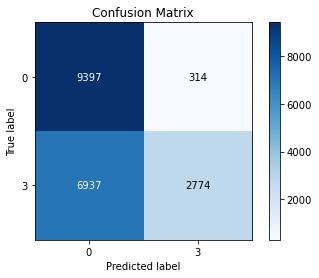

Accuracy: 0.62666 
Precision: 0.89832 
Recall: 0.28566 
F-measure: 0.43347 


In [113]:
y_r2l_rfe_prediction = DT(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

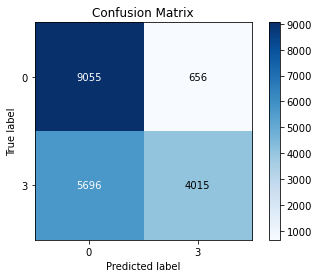

Accuracy: 0.67295 
Precision: 0.85956 
Recall: 0.41345 
F-measure: 0.55834 


In [114]:
y_r2l_rfe_prediction = DT(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [115]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9539026726524898,
 'Mean Training Precision': 0.9178739680332336,
 'Mean Training Recall': 0.9950099731364137,
 'Mean Training F1 Score': 0.9548086349038106,
 'Mean Validation Accuracy': 0.9539162528842533,
 'Mean Validation Precision': 0.5042072132766683,
 'Mean Validation Recall': 0.9759273489907292,
 'Mean Validation F1 Score': 0.5071389995806843}

#### K-fold cross validation on u2r Standard Scaler

In [116]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9539026726524898,
 'Mean Training Precision': 0.9178739680332336,
 'Mean Training Recall': 0.9950099731364137,
 'Mean Training F1 Score': 0.9548086349038106,
 'Mean Validation Accuracy': 0.9539162528842533,
 'Mean Validation Precision': 0.5042072132766683,
 'Mean Validation Recall': 0.9759273489907292,
 'Mean Validation F1 Score': 0.5071389995806843}

#### Stratified cross validation on u2r

In [117]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9539034823406096,
 'Mean Training Precision': 0.9194212580514304,
 'Mean Training Recall': 0.9950106172655537,
 'Mean Training F1 Score': 0.9557236106825169,
 'Mean Validation Accuracy': 0.9538927446789947,
 'Mean Validation Precision': 0.9194175547352298,
 'Mean Validation Recall': 0.9950106155005931,
 'Mean Validation F1 Score': 0.9557180013839238}

#### Stratified cross validation on u2r Standard Scaler

In [118]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9539034823406096,
 'Mean Training Precision': 0.9194212580514304,
 'Mean Training Recall': 0.9950106172655537,
 'Mean Training F1 Score': 0.9557236106825169,
 'Mean Validation Accuracy': 0.9539001696864196,
 'Mean Validation Precision': 0.9194301110308203,
 'Mean Validation Recall': 0.9950106155005931,
 'Mean Validation F1 Score': 0.9557247974865307}

#### Predict on u2r

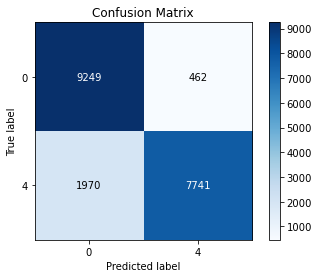

Accuracy: 0.87478 
Precision: 0.94368 
Recall: 0.79714 
F-measure: 0.86424 


In [119]:
y_u2r_rfe_prediction = DT(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

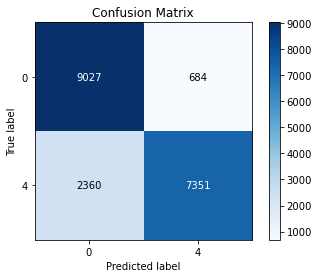

Accuracy: 0.84327 
Precision: 0.91487 
Recall: 0.75698 
F-measure: 0.82847 


In [120]:
y_u2r_rfe_prediction = DT(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

# Full DF, no Oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

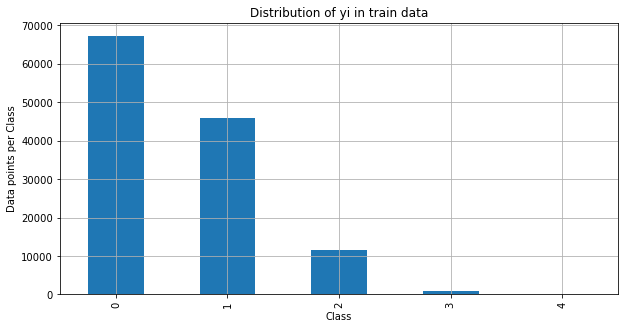

In [121]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()


fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

fullDf['label'], fullDf_test['label'] = prepareMulticlass()

plotDf(fullDf['label'])

In [122]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(fullDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(fullDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)


In [123]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

#### K-fold cross validation on dos

In [124]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9823607309967335,
 'Mean Training Precision': 0.996675911372568,
 'Mean Training Recall': 0.9596971482550835,
 'Mean Training F1 Score': 0.9778370299032284,
 'Mean Validation Accuracy': 0.9823607309967335,
 'Mean Validation Precision': 0.9966738112543686,
 'Mean Validation Recall': 0.9597160427319833,
 'Mean Validation F1 Score': 0.9778442966678688}

#### K-fold cross validation on dos Standard Scaling

In [125]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9823607309967335,
 'Mean Training Precision': 0.996675911372568,
 'Mean Training Recall': 0.9596971482550835,
 'Mean Training F1 Score': 0.9778370299032284,
 'Mean Validation Accuracy': 0.9823607309967335,
 'Mean Validation Precision': 0.9966738112543686,
 'Mean Validation Recall': 0.9597160427319833,
 'Mean Validation F1 Score': 0.9778442966678688}

#### Stratified cross validation on dos

In [126]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9823607309967336,
 'Mean Training Precision': 0.9966759399124389,
 'Mean Training Recall': 0.9596969103853287,
 'Mean Training F1 Score': 0.9778369235635491,
 'Mean Validation Accuracy': 0.9823607309967335,
 'Mean Validation Precision': 0.99667610184291,
 'Mean Validation Recall': 0.9596969160766535,
 'Mean Validation F1 Score': 0.9778357330189683}

#### Stratified cross validation on dos Standard Scaling

In [127]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9823607309967336,
 'Mean Training Precision': 0.9966759399124389,
 'Mean Training Recall': 0.9596969103853287,
 'Mean Training F1 Score': 0.9778369235635491,
 'Mean Validation Accuracy': 0.9823607309967335,
 'Mean Validation Precision': 0.99667610184291,
 'Mean Validation Recall': 0.9596969160766535,
 'Mean Validation F1 Score': 0.9778357330189683}

#### Predict on dos

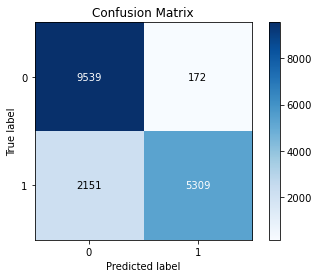

Accuracy: 0.86471 
Precision: 0.96862 
Recall: 0.71166 
F-measure: 0.82049 


In [128]:
y_dos_prediction = DT(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

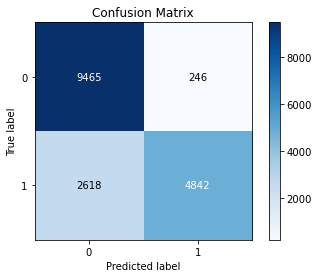

Accuracy: 0.83321 
Precision: 0.95165 
Recall: 0.64906 
F-measure: 0.77176 


In [129]:
y_dos_prediction = DT(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [130]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9867072861242248,
 'Mean Training Precision': 0.9343936479283498,
 'Mean Training Recall': 0.9786184984087882,
 'Mean Training F1 Score': 0.9559946471125894,
 'Mean Validation Accuracy': 0.9866707210174017,
 'Mean Validation Precision': 0.9342926143511028,
 'Mean Validation Recall': 0.9783814858526055,
 'Mean Validation F1 Score': 0.9558115209267625}

#### K-fold cross validation on probe Standard Scaling

In [131]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9867072861242248,
 'Mean Training Precision': 0.9343936479283498,
 'Mean Training Recall': 0.9786184984087882,
 'Mean Training F1 Score': 0.9559946471125894,
 'Mean Validation Accuracy': 0.9866707210174017,
 'Mean Validation Precision': 0.9342926143511028,
 'Mean Validation Recall': 0.9783814858526055,
 'Mean Validation F1 Score': 0.9558115209267625}

#### Stratified cross validation on probe

In [132]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.986707286124225,
 'Mean Training Precision': 0.9343949336688212,
 'Mean Training Recall': 0.9786185544302853,
 'Mean Training F1 Score': 0.9559953925341815,
 'Mean Validation Accuracy': 0.9866707210174017,
 'Mean Validation Precision': 0.9343954038588349,
 'Mean Validation Recall': 0.9783809509787321,
 'Mean Validation F1 Score': 0.9558677932657913}

#### Stratified cross validation on probe Standard Scaling

In [133]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.986707286124225,
 'Mean Training Precision': 0.9343949336688212,
 'Mean Training Recall': 0.9786185544302853,
 'Mean Training F1 Score': 0.9559953925341815,
 'Mean Validation Accuracy': 0.9866707210174017,
 'Mean Validation Precision': 0.9343954038588349,
 'Mean Validation Recall': 0.9783809509787321,
 'Mean Validation F1 Score': 0.9558677932657913}

#### Predict on probe

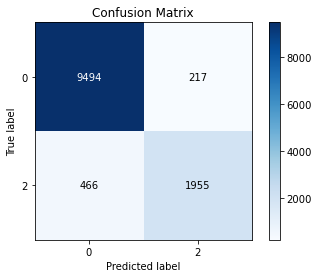

Accuracy: 0.94370 
Precision: 0.90009 
Recall: 0.80752 
F-measure: 0.85130 


In [134]:
y_probe_prediction = DT(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

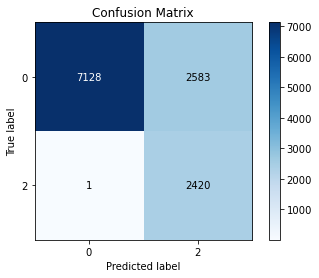

Accuracy: 0.78701 
Precision: 0.48371 
Recall: 0.99959 
F-measure: 0.65194 


In [135]:
y_probe_prediction = DT(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [136]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9939565102762726,
 'Mean Training Precision': 0.7740220442678052,
 'Mean Training Recall': 0.8261259521864293,
 'Mean Training F1 Score': 0.7992201958458687,
 'Mean Validation Accuracy': 0.993956509409804,
 'Mean Validation Precision': 0.7746295445479999,
 'Mean Validation Recall': 0.8260390047459891,
 'Mean Validation F1 Score': 0.7990852104546808}

#### K-fold cross validation on r2l Standard Scaling

In [137]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9939565102762726,
 'Mean Training Precision': 0.7740220442678052,
 'Mean Training Recall': 0.8261259521864293,
 'Mean Training F1 Score': 0.7992201958458687,
 'Mean Validation Accuracy': 0.993956509409804,
 'Mean Validation Precision': 0.7746295445479999,
 'Mean Validation Recall': 0.8260390047459891,
 'Mean Validation F1 Score': 0.7990852104546808}

#### Stratified cross validation on r2l

In [138]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.993956510302708,
 'Mean Training Precision': 0.7740286873510016,
 'Mean Training Recall': 0.8261309108140462,
 'Mean Training F1 Score': 0.7992230025679612,
 'Mean Validation Accuracy': 0.9939418788325229,
 'Mean Validation Precision': 0.7745683101190346,
 'Mean Validation Recall': 0.8261515151515153,
 'Mean Validation F1 Score': 0.7988972123233735}

#### Stratified cross validation on r2l Standard Scaling

In [139]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.993956510302708,
 'Mean Training Precision': 0.7740286873510016,
 'Mean Training Recall': 0.8261309108140462,
 'Mean Training F1 Score': 0.7992230025679612,
 'Mean Validation Accuracy': 0.9939565115512818,
 'Mean Validation Precision': 0.7753192258699505,
 'Mean Validation Recall': 0.8261515151515153,
 'Mean Validation F1 Score': 0.7992893691861186}

#### Predict on r2l

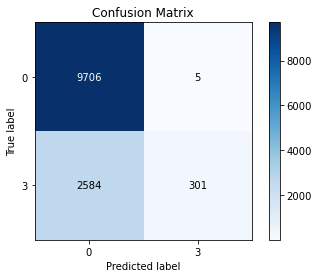

Accuracy: 0.79446 
Precision: 0.98366 
Recall: 0.10433 
F-measure: 0.18866 


In [140]:
y_r2l_prediction = DT(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

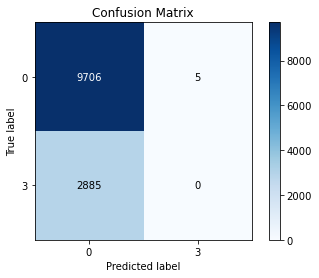

Accuracy: 0.77056 
Precision: 0.00000 
Recall: 0.00000 
F-measure: 0.00000 


In [141]:
y_r2l_prediction = DT(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [142]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992712943871485,
 'Mean Training Precision': 0.3864363296913512,
 'Mean Training Recall': 0.30343799932722226,
 'Mean Training F1 Score': 0.33947609145717317,
 'Mean Validation Accuracy': 0.9991245674344343,
 'Mean Validation Precision': 0.24166666666666664,
 'Mean Validation Recall': 0.1975,
 'Mean Validation F1 Score': 0.21262626262626264}

#### K-fold cross validation on u2r Standard Scaling

In [143]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9992712943871485,
 'Mean Training Precision': 0.3864363296913512,
 'Mean Training Recall': 0.30343799932722226,
 'Mean Training F1 Score': 0.33947609145717317,
 'Mean Validation Accuracy': 0.9991245674344343,
 'Mean Validation Precision': 0.24166666666666664,
 'Mean Validation Recall': 0.1975,
 'Mean Validation F1 Score': 0.21262626262626264}

#### Stratified cross validation on u2r

In [144]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992729430558484,
 'Mean Training Precision': 0.38683550353092755,
 'Mean Training Recall': 0.30948196114708604,
 'Mean Training F1 Score': 0.3434925145964838,
 'Mean Validation Accuracy': 0.9991097306391821,
 'Mean Validation Precision': 0.19833333333333333,
 'Mean Validation Recall': 0.15999999999999998,
 'Mean Validation F1 Score': 0.17484848484848486}

#### Stratified cross validation on u2r Standard Scaling

In [145]:
stratifiedCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60608, 1=47, Test: 0=6735, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9992729430558484,
 'Mean Training Precision': 0.38683550353092755,
 'Mean Training Recall': 0.30948196114708604,
 'Mean Training F1 Score': 0.3434925145964838,
 'Mean Validation Accuracy': 0.9991097306391821,
 'Mean Validation Precision': 0.19833333333333333,
 'Mean Validation Recall': 0.15999999999999998,
 'Mean Validation F1 Score': 0.17484848484848486}

#### Predict on u2r

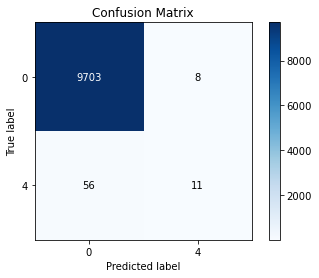

Accuracy: 0.99345 
Precision: 0.57895 
Recall: 0.16418 
F-measure: 0.25581 


In [146]:
y_u2r_prediction = DT(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

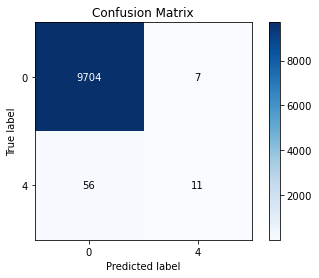

Accuracy: 0.99356 
Precision: 0.61111 
Recall: 0.16418 
F-measure: 0.25882 


In [147]:
y_u2r_prediction = DT(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

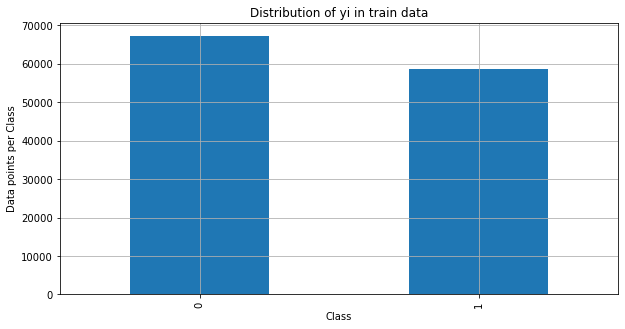

In [148]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()

fullDf['label'], fullDf_test['label'] = prepareBinary()

fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

colNames=list(fullDf)
colNames_test=list(fullDf_test)

plotDf(fullDf['label'])


In [149]:
x_df, y_df = getXandY(fullDf)
x_df_test, y_df_test = getXandY(fullDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)


In [150]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9746612369577605,
 'Mean Training Precision': 0.964927710092204,
 'Mean Training Recall': 0.9812212900159973,
 'Mean Training F1 Score': 0.9730062577171867,
 'Mean Validation Accuracy': 0.9746533006426092,
 'Mean Validation Precision': 0.964913848985175,
 'Mean Validation Recall': 0.9812099218223423,
 'Mean Validation F1 Score': 0.9729908325154669}

In [151]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9746612369577605,
 'Mean Training Precision': 0.964927710092204,
 'Mean Training Recall': 0.9812212900159973,
 'Mean Training F1 Score': 0.9730062577171867,
 'Mean Validation Accuracy': 0.9746533006426092,
 'Mean Validation Precision': 0.964913848985175,
 'Mean Validation Recall': 0.9812099218223423,
 'Mean Validation F1 Score': 0.9729908325154669}

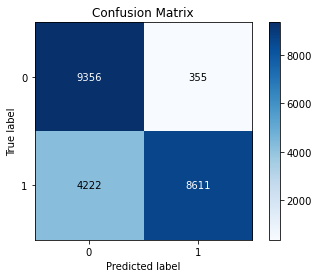

Accuracy: 0.79697 
Precision: 0.96041 
Recall: 0.67100 
F-measure: 0.79004 


In [152]:
y_prediction = DT(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

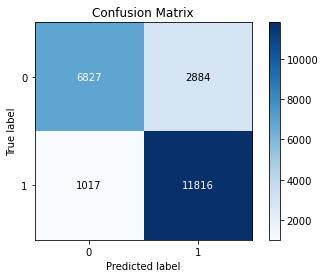

Accuracy: 0.82696 
Precision: 0.80381 
Recall: 0.92075 
F-measure: 0.85832 


In [153]:
y_prediction = DT(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [154]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(x_df), y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [155]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(x_df_ss), y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [156]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9746612369577605,
 'Mean Training Precision': 0.964927710092204,
 'Mean Training Recall': 0.9812212900159973,
 'Mean Training F1 Score': 0.9730062577171867,
 'Mean Validation Accuracy': 0.9746533006426092,
 'Mean Validation Precision': 0.964913848985175,
 'Mean Validation Recall': 0.9812099218223423,
 'Mean Validation F1 Score': 0.9729908325154669}

#### K-fold cross validation Standard Scaler

In [157]:
KfoldCV(DecisionTreeClassifier(criterion = 'gini', max_depth=3, min_samples_leaf=32), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9746612369577605,
 'Mean Training Precision': 0.964927710092204,
 'Mean Training Recall': 0.9812212900159973,
 'Mean Training F1 Score': 0.9730062577171867,
 'Mean Validation Accuracy': 0.9746533006426092,
 'Mean Validation Precision': 0.964913848985175,
 'Mean Validation Recall': 0.9812099218223423,
 'Mean Validation F1 Score': 0.9729908325154669}

#### Predict

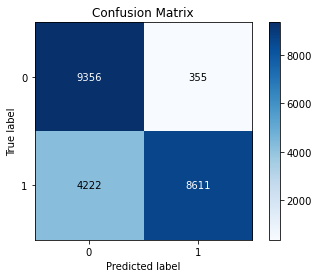

Accuracy: 0.79697 
Precision: 0.96041 
Recall: 0.67100 
F-measure: 0.79004 


In [158]:
y_prediction = DT(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

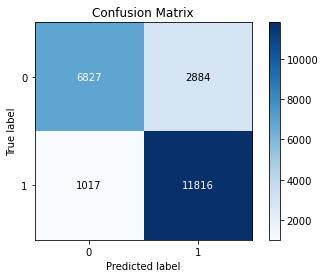

Accuracy: 0.82696 
Precision: 0.80381 
Recall: 0.92075 
F-measure: 0.85832 


In [159]:
y_prediction = DT(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)